# 3D Scatter With Express

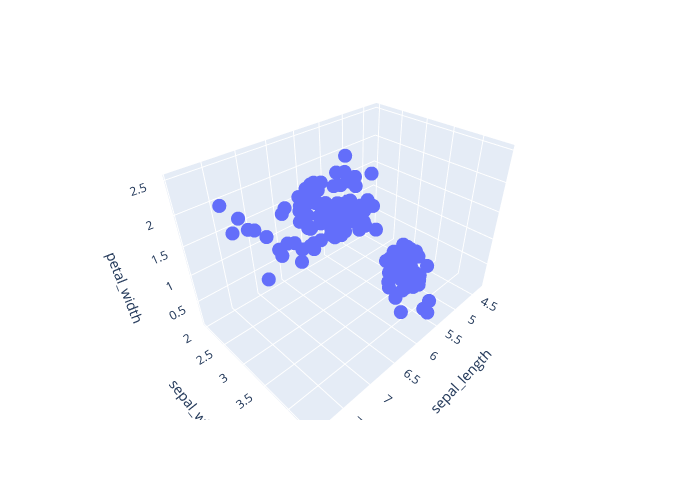

In [2]:
import plotly.express as px

px.scatter_3d( px.data.iris(), 
    x='sepal_length', 
    y='sepal_width', 
    z='petal_width'
)

## Categorical Color

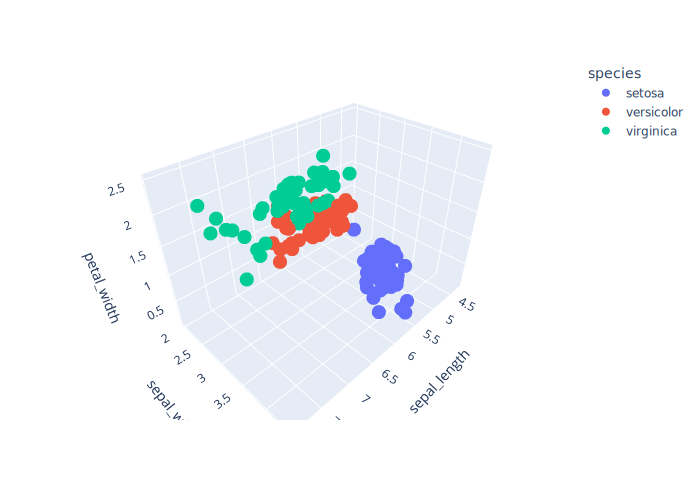

In [3]:
import plotly.express as px

px.scatter_3d( px.data.iris(), 
    x='sepal_length', 
    y='sepal_width', 
    z='petal_width',
    color='species'
)

## Continuous Color

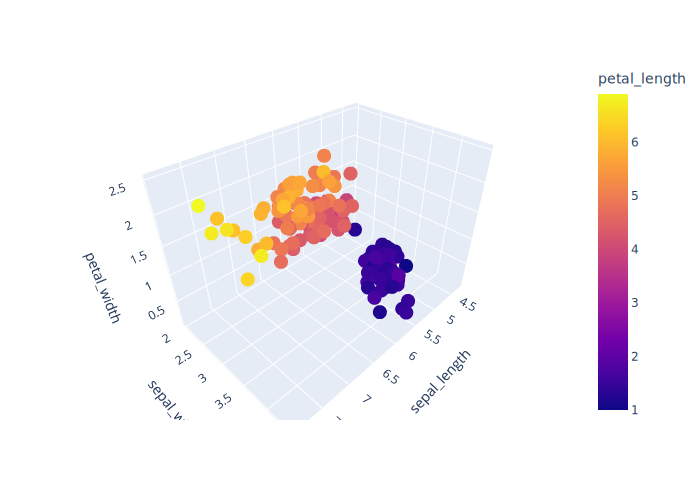

In [4]:
import plotly.express as px

px.scatter_3d( px.data.iris(), 
    x='sepal_length', 
    y='sepal_width', 
    z='petal_width',
    color='petal_length'
)

## Symbol

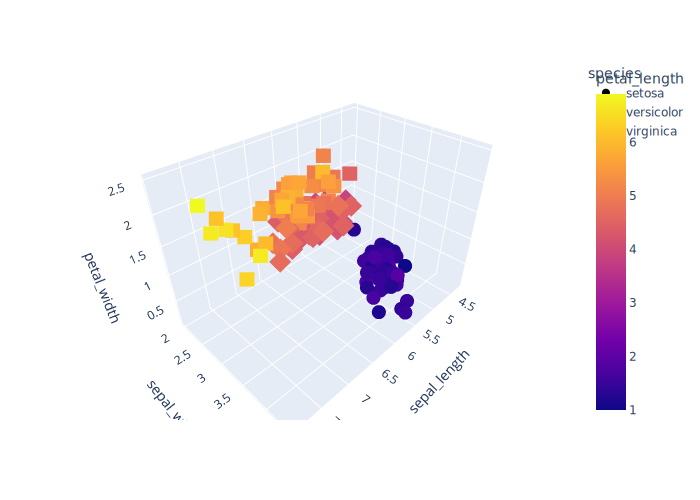

In [5]:
import plotly.express as px

px.scatter_3d( px.data.iris(), 
    x='sepal_length', 
    y='sepal_width', 
    z='petal_width',
    color='petal_length',
    symbol='species'
)

## Styling

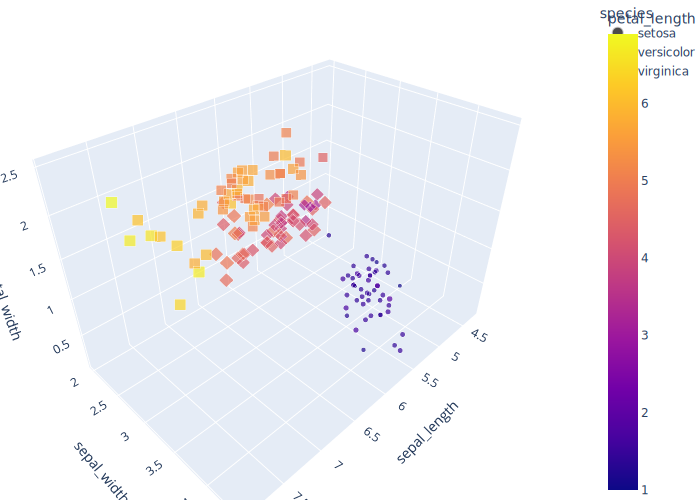

In [6]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='petal_length', size='petal_length', size_max=18,
              symbol='species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

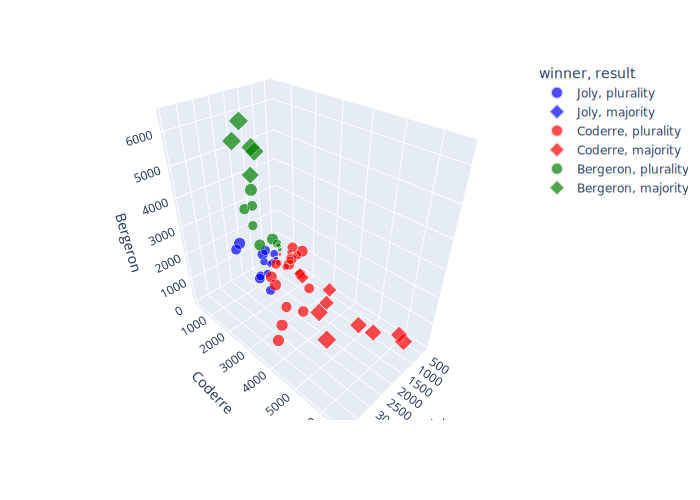

In [7]:
import plotly.express as px
px.scatter_3d(px.data.election(), x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})

## Annotation

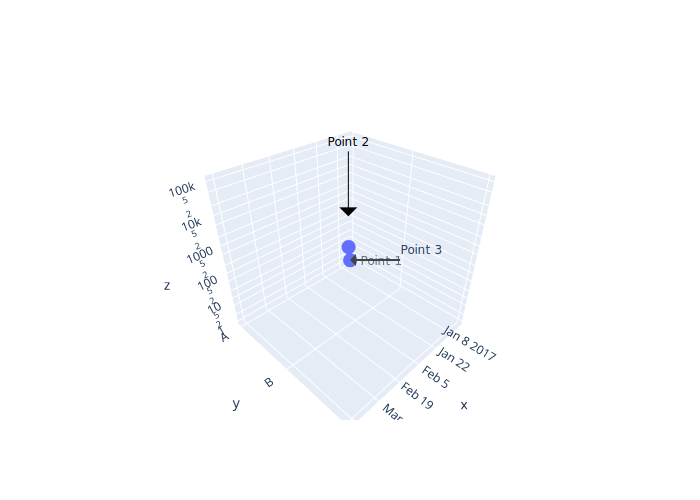

In [8]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=["2017-01-01", "2017-02-10", "2017-03-20"],
    y=["A", "B", "C"],
    z=[1, 1000, 100000],
    name="z",
))

fig.update_layout(
    scene=dict(
        xaxis=dict(type="date"),
        yaxis=dict(type="category"),
        zaxis=dict(type="log"),
        annotations=[
        dict(
            showarrow=False,
            x="2017-01-01",
            y="A",
            z=0,
            text="Point 1",
            xanchor="left",
            xshift=10,
            opacity=0.7),
        dict(
            x="2017-02-10",
            y="B",
            z=4,
            text="Point 2",
            textangle=0,
            ax=0,
            ay=-75,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x="2017-03-20",
            y="C",
            z=5,
            ax=50,
            ay=0,
            text="Point 3",
            arrowhead=1,
            xanchor="left",
            yanchor="bottom"
        )]
    ),
)

fig.show()

## 3D Regression Surface

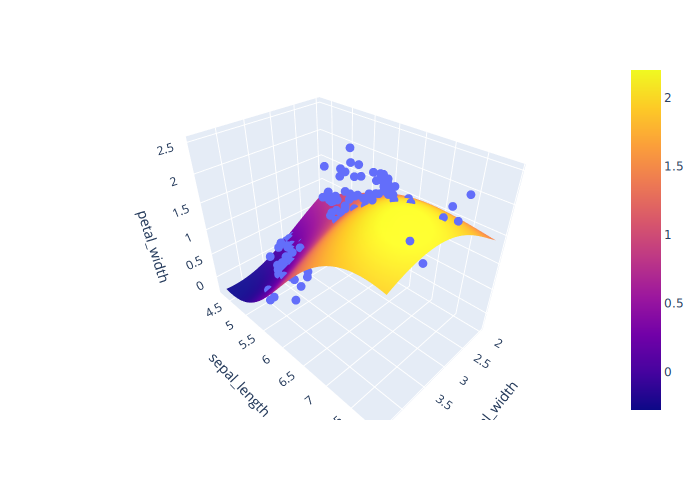

In [9]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = .02
margin = 0

df = px.data.iris()

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = SVR(C=1.)
model.fit(X.values, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()